In [1]:
from pathlib import Path
import random

import matplotlib.pyplot as plt
import seaborn as sns
import h5py

sns.set_palette(sns.color_palette('deep'))

In [2]:
project_dir = Path.cwd().parent
lbl_dir =  project_dir / 'dataset' / 'commaai' / 'log'
img_dir = project_dir / 'dataset' / 'commaai' / 'camera'

In [148]:
h5_files = img_dir.glob('*.h5')
[x.name for x in h5_files]

['2016-04-21--14-48-08.h5',
 '2016-03-29--10-50-20.h5',
 '2016-06-08--11-46-01.h5',
 '2016-01-31--19-19-25.h5',
 '2016-01-30--11-24-51.h5',
 '2016-01-30--13-46-00.h5',
 '2016-05-12--22-20-00.h5',
 '2016-02-02--10-16-58.h5',
 '2016-06-02--21-39-29.h5',
 '2016-02-08--14-56-28.h5',
 '2016-02-11--21-32-47.h5']

In [149]:
sample_file = '2016-01-30--13-46-00.h5'

img_path = img_dir / sample_file
lbl_path = lbl_dir / sample_file

In [150]:
with h5py.File(img_path, 'r') as f:
    x = f['X']
    print(f'Image file shape: {x.shape}')

with h5py.File(lbl_path, 'r') as f:
    x = f['steering_angle']
    ptr = f['cam1_ptr']
    sec = f['times']
    print(f'Label file shape: {x.shape}')
    print(f'ptf file shape: {ptr.shape}')
    print(f'Second file shape: {sec.shape}')

Image file shape: (58993, 3, 160, 320)
Label file shape: (294919,)
ptf file shape: (294919,)
Second file shape: (294919,)


### Points to note

1. Steering labels (and other label types) are recorded every 10 ms
2. Images are recorded every 50 ms
3. `cam1_ptr` dataset records the mapping between label and camera frame

# Explore images

H5 index: 22666


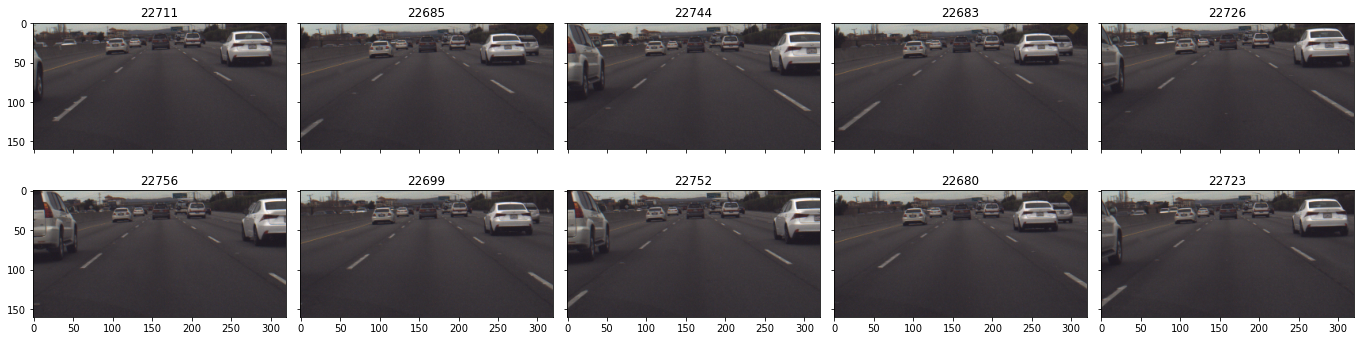

In [157]:
with h5py.File(img_path, 'r') as f:
    x = f['X']
    size = x.shape[0]
    index = random.randint(0, size-200)
#     index = 800
    data = x[index: index + 100]

fig, ax = plt.subplots(2, 5, figsize=(19, 5), sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    ix = random.randint(0, 99)
    img = data[ix].swapaxes(0, 2).swapaxes(0, 1)
    ax[i].imshow(img)
    ax[i].set_title(index + ix)
    
plt.tight_layout()
    
print(f'H5 index: {index}')

**First 900 images of `2016-01-30--11-24-51.h5` are garbage**

# Explore labels

In [143]:
with h5py.File(lbl_path, 'r') as f:
    labels = list(f.keys())[:]
    steering = f['steering_angle'][:]
    time = f['times'][:]
    
labels

['UN_D_cam1_ptr',
 'UN_D_cam2_ptr',
 'UN_D_camphone_ptr',
 'UN_D_lidar_ptr',
 'UN_D_radar_msg',
 'UN_D_rawgps',
 'UN_T_cam1_ptr',
 'UN_T_cam2_ptr',
 'UN_T_camphone_ptr',
 'UN_T_lidar_ptr',
 'UN_T_radar_msg',
 'UN_T_rawgps',
 'blinker',
 'brake',
 'brake_computer',
 'brake_user',
 'cam1_ptr',
 'cam2_ptr',
 'camphone_ptr',
 'car_accel',
 'fiber_accel',
 'fiber_compass',
 'fiber_compass_x',
 'fiber_compass_y',
 'fiber_compass_z',
 'fiber_gyro',
 'fiber_temperature',
 'gas',
 'gear_choice',
 'gps_1_fix',
 'gps_1_pos',
 'gps_1_vel',
 'gps_2_fix',
 'gps_2_pos',
 'gps_2_vel',
 'idx',
 'imu_accel',
 'imu_compass',
 'imu_gyro',
 'rpm',
 'rpm_post_torque',
 'selfdrive',
 'speed',
 'speed_abs',
 'speed_fl',
 'speed_fr',
 'speed_rl',
 'speed_rr',
 'standstill',
 'steering_angle',
 'steering_torque',
 'times',
 'velodyne_gps',
 'velodyne_heading',
 'velodyne_imu']

[Label definition](https://github.com/commaai/research/blob/master/Logs.md)

Text(0.5, 1.0, 'Steering angle')

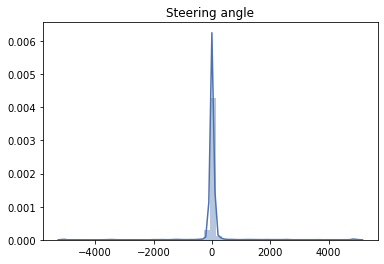

In [123]:
ax = sns.distplot(steering)
_ = ax.set_title('Steering angle')

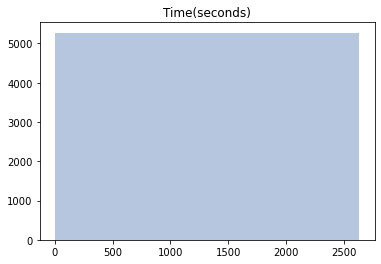

In [131]:
ax = sns.distplot(time, kde=False)
_ = ax.set_title('Time(seconds)')